# Polynomial regression

An obious way to enhance the simple regression model {eq}`simple-lin-reg` is to add more powers of predictor $\boldsymbol x$. For example, consider **quadratic regression**

```{math}
    :label: quad-reg
    y = w_0 + w_1 x + w_2 x^2.
```

Now the model has three parameters $\boldsymbol w = (w_0, w_1, w_2)$, which could be also fitted by optimizing of MSE:

```{math}
:label: quad-mse
\mathcal L(\boldsymbol w) =  \frac 1n\sum\limits_{i=1}^n (y_i  - w_0 - w_1x_i - w_2x_i^2)^2 \to \min\limits_{\boldsymbol w}.
```

(boston-quadratic)=
## Revisit Boston dataset

The data look quite suitable for a quadratic regression. Let's do a simple feature engineering and add new feature of squares. Now the design matrix has two columns:

$$
\boldsymbol X = [\boldsymbol x\; \boldsymbol x^2] = \begin{pmatrix}
x_1 & x_1^2 \\
x_2 & x_2^2 \\
\vdots & \vdots \\
x_n & x_n^2
\end{pmatrix}.
$$

To fit the linear regression on the new dataset, once again use `sklearn` library:

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

boston = pd.read_csv("../ISLP_datsets/Boston.csv")

x = boston['lstat']
y = boston['medv']

LR = LinearRegression()
x_reshaped = x.values.reshape(-1, 1)
x_train = np.hstack([x_reshaped, x_reshaped**2])
LR.fit(x_train, y)
print("intercept:", LR.intercept_)
print("coefficients:", LR.coef_)
print("r-score:", LR.score(x_train, y))
print("MSE:", np.mean((LR.predict(x_train) - y) ** 2))

intercept: 42.86200732816936
coefficients: [-2.3328211   0.04354689]
r-score: 0.6407168971636612
MSE: 30.330520075853713


Our metrics have improved, now plot the graphs:

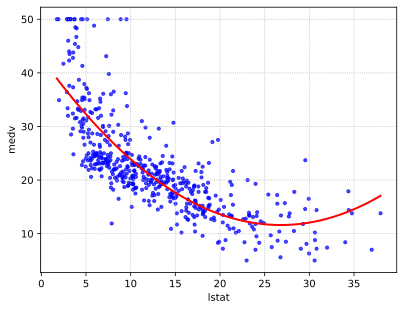

In [8]:
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'
plt.scatter(x, y, s=10, c='b', alpha=0.7)
xs = np.linspace(x.min(), x.max(), num=100)
plt.plot(xs, LR.intercept_ + LR.coef_[0]*xs + LR.coef_[1]*xs**2, c='r', lw=2)
plt.xlabel("lstat")
plt.ylabel("medv")
plt.grid(ls=":");

## General case

Of course, the degree of the polynomial can be any number $m\in\mathbb N$. The model of the polynomial regression is

```{math}
    :label: poly-reg
    y = w_0 + w_1 x + w_2 x^2 + \ldots + w_m x^m = \sum\limits_{k=0}^m w_k x^k.
```

**Q.** How many parameters does this model have?

In case of MSE loss the model is fitted via minimizing the function

```{math}
:label: poly-mse
\mathcal L(\boldsymbol w) =  \frac 1n\sum\limits_{i=1}^n \Big(y_i  - \sum\limits_{k=0}^m w_k x^k\Big)^2 \to \min\limits_{\boldsymbol w}.
```

## Exercises

1. Find the analytical solution of the optimization task {eq}`quad-mse`.

2. Find the feature matrix of the polynomial regression model {eq}`poly-reg`.

```{admonition} TODO
:class: warning
* Provide examples of dataset, where increasing of degreee is beneficial
* Make connection with Runge example from the first chapter
* Add some quizzes
* Add more datasets (may me even simulated)
* Think about cases where the performance of a polynomial model of any degree is poor
```
